# Margin Catalogs in LSDB

This demonstrates loading margin catalogs with LSDB, and how they're used in crossmatches.

First, we start with loading a margin catalog

In [1]:
import lsdb
import numpy as np
import pandas as pd
from hipscat.inspection import plot_pixels
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
import healpy as hp

# %matplotlib notebook

In [2]:
ztf_margin = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_dr14_10arcs")
ztf_margin

/astro/users/seanmcgu/hipscat_deploy/src/hipscat/catalog/partition_info.py:107: UserWarning: Reading partitions from parquet metadata. This is typically slow.
  warnings.warn("Reading partitions from parquet metadata. This is typically slow.")


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,margin_Norder,margin_Dir,margin_Npix,Norder,Npix,Dir
npartitions=2352,,,,,,,,,,,,,,,,,,
0,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32,uint8,uint64,uint64
18014398509481984,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13830554455654793216,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
isinstance(ztf_margin, lsdb.catalog.margin_catalog.MarginCatalog)
ztf_margin.hc_structure.catalog_info.margin_threshold

10

This shares the column and partitioning structure with its original catalog. (With three added columns to specify the healpix pixel the points are from as well as their pixel in the margin catalog)

In [4]:
ztf = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_dr14", margin_cache=ztf_margin)
print(ztf.margin is ztf_margin)
ztf

True


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,Norder,Dir,Npix
npartitions=2352,,,,,,,,,,,,,,,
0,int64,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,int32,int32,int32
18014398509481984,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13830554455654793216,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18446744073709551615,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


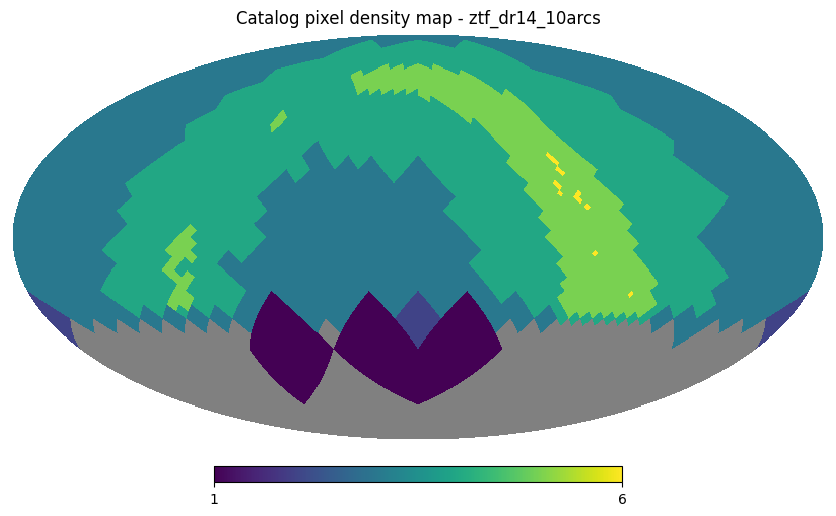

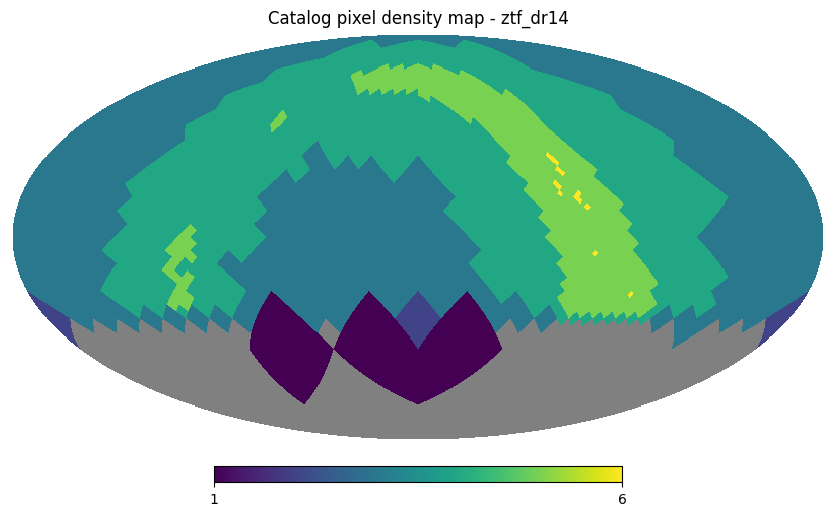

In [5]:
plot_pixels(ztf_margin.hc_structure)
plot_pixels(ztf.hc_structure)

Let's take a closer look at a single margin pixel

In [6]:
order = 5
pixel = 3858

ztf_pixel_df = ztf.get_partition(order, pixel).compute()
pixel_df = ztf_margin.get_partition(order, pixel).compute()
print(len(ztf_pixel_df))
pixel_df

503335


,ps1_objid,ra,dec,ps1_gMeanPSFMag,ps1_rMeanPSFMag,ps1_iMeanPSFMag,nobs_g,nobs_r,nobs_i,mean_mag_g,mean_mag_r,mean_mag_i,margin_Norder,margin_Dir,margin_Npix,Norder,Npix,Dir
649744,167643199992612671,319.999207,49.701649,19.546301,18.230200,17.477900,38,87,0,19.654276,18.129864,NaN,5,0,3845,5,3858,0
237587,167643199982213875,319.998169,49.702662,16.397400,15.499100,15.010000,58,90,0,16.465514,15.415698,NaN,5,0,3847,5,3858,0
237626,167643199913849715,319.991333,49.707520,21.965300,20.976601,19.865499,0,39,0,NaN,20.889438,NaN,5,0,3847,5,3858,0
237641,167653199871293642,319.987549,49.710857,-999.000000,21.255100,20.282900,0,34,0,NaN,20.766798,NaN,5,0,3847,5,3858,0
237644,167653199878323730,319.987549,49.710857,-999.000000,21.316401,20.175100,0,34,0,NaN,20.766798,NaN,5,0,3847,5,3858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119868,171333203709907445,320.370962,52.780507,-999.000000,21.836800,20.485399,0,199,37,NaN,21.311140,20.060356,5,0,3864,5,3858,0
119871,171333203714908364,320.371490,52.781351,-999.000000,-999.000000,21.080299,0,32,17,NaN,21.409677,20.611176,5,0,3864,5,3858,0
119874,171333203712779331,320.371277,52.782154,-999.000000,21.932800,20.673599,0,7,29,NaN,21.220576,20.238838,5,0,3864,5,3858,0
3,171363203985367204,320.398529,52.805442,19.760000,20.655800,19.432199,4,49,40,21.438548,20.336581,19.178884,5,0,3865,5,3858,0


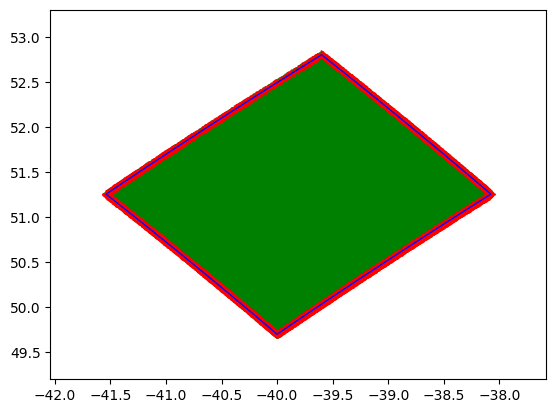

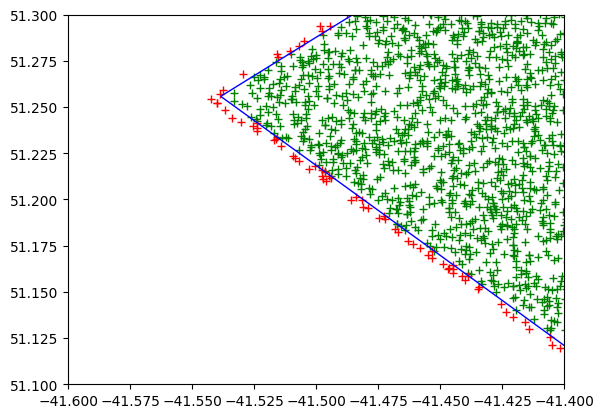

In [10]:
def plot_points(pixel_dfs, order, pixel, colors, ra_columns, dec_columns, xlim=None, ylim=None):
    ax = plt.subplot()

    # Plot hp pixel bounds
    nsides = hp.order2nside(order)
    pix0_bounds = hp.vec2dir(hp.boundaries(nsides, pixel, step=100, nest=True), lonlat=True)
    lon = pix0_bounds[0]
    lat = pix0_bounds[1]
    vertices = np.vstack([lon.ravel(), lat.ravel()]).transpose()
    p = Polygon(vertices, closed=True, edgecolor='blue', facecolor='none')
    
    for pixel_df, color, ra_column, dec_column in zip(pixel_dfs, colors, ra_columns, dec_columns):
        ax.scatter(pixel_df[ra_column].values - 360, pixel_df[dec_column].values, c=color, marker='+', linewidths=1)
    ax.add_patch(p)

    VIEW_MARGIN = 0.5

    xlim_low = np.min(lon) - VIEW_MARGIN if xlim is None else xlim[0]
    xlim_high = np.max(lon) + VIEW_MARGIN if xlim is None else xlim[1]
    ylim_low = np.min(lat) - VIEW_MARGIN if ylim is None else ylim[0]
    ylim_high = np.max(lat) + VIEW_MARGIN if ylim is None else ylim[1]
    
    plt.xlim(xlim_low, xlim_high)
    plt.ylim(ylim_low, ylim_high)
    plt.show()

plot_points([ztf_pixel_df, pixel_df], order, pixel, ['green', 'red'], ['ra', 'ra'], ['dec', 'dec'])
plot_points([ztf_pixel_df, pixel_df], order, pixel, ['green', 'red'], ['ra', 'ra'], ['dec', 'dec'], xlim=[-41.6, -41.4], ylim = [51.1, 51.3])

In a catalog with the margin loaded, computing the catalog doesn't include the margin, so no need for deduplication

## Crossmatching with margins

When a catalog is loaded with a margin, it can be used in a crossmatch. So far, I've tested running gaia x ztf.

Running crossmatch with margins gaia x ztf time = 93.1 mins total rows = 650548728
Running crossmatch w/o margins gaia x ztf time = 85.86 mins total rows = 650475453

Let's look at the extra rows that are added with the margin

In [11]:
gaia_x_ztf = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/gaia_x_ztf")
print(gaia_x_ztf.hc_structure.catalog_info.total_rows)
gaia_x_ztf

650548728


,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,parallax_error_gaia,parallax_over_error_gaia,pm_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,ra_dec_corr_gaia,ra_parallax_corr_gaia,ra_pmra_corr_gaia,ra_pmdec_corr_gaia,dec_parallax_corr_gaia,dec_pmra_corr_gaia,dec_pmdec_corr_gaia,parallax_pmra_corr_gaia,parallax_pmdec_corr_gaia,pmra_pmdec_corr_gaia,astrometric_n_obs_al_gaia,astrometric_n_obs_ac_gaia,astrometric_n_good_obs_al_gaia,astrometric_n_bad_obs_al_gaia,astrometric_gof_al_gaia,astrometric_chi2_al_gaia,astrometric_excess_noise_gaia,astrometric_excess_noise_sig_gaia,astrometric_params_solved_gaia,astrometric_primary_flag_gaia,nu_eff_used_in_astrometry_gaia,pseudocolour_gaia,pseudocolour_error_gaia,ra_pseudocolour_corr_gaia,dec_pseudocolour_corr_gaia,parallax_pseudocolour_corr_gaia,pmra_pseudocolour_corr_gaia,pmdec_pseudocolour_corr_gaia,astrometric_matched_transits_gaia,visibility_periods_used_gaia,astrometric_sigma5d_max_gaia,matched_transits_gaia,new_matched_transits_gaia,matched_transits_removed_gaia,ipd_gof_harmonic_amplitude_gaia,ipd_gof_harmonic_phase_gaia,ipd_frac_multi_peak_gaia,ipd_frac_odd_win_gaia,ruwe_gaia,scan_direction_strength_k1_gaia,scan_direction_strength_k2_gaia,scan_direction_strength_k3_gaia,scan_direction_strength_k4_gaia,scan_direction_mean_k1_gaia,scan_direction_mean_k2_gaia,scan_direction_mean_k3_gaia,scan_direction_mean_k4_gaia,duplicated_source_gaia,phot_g_n_obs_gaia,phot_g_mean_flux_gaia,phot_g_mean_flux_error_gaia,phot_g_mean_flux_over_error_gaia,phot_g_mean_mag_gaia,phot_bp_n_obs_gaia,phot_bp_mean_flux_gaia,phot_bp_mean_flux_error_gaia,phot_bp_mean_flux_over_error_gaia,phot_bp_mean_mag_gaia,phot_rp_n_obs_gaia,phot_rp_mean_flux_gaia,phot_rp_mean_flux_error_gaia,phot_rp_mean_flux_over_error_gaia,phot_rp_mean_mag_gaia,phot_bp_rp_excess_factor_gaia,phot_bp_n_contaminated_transits_gaia,phot_bp_n_blended_transits_gaia,phot_rp_n_contaminated_transits_gaia,phot_rp_n_blended_transits_gaia,phot_proc_mode_gaia,bp_rp_gaia,bp_g_gaia,g_rp_gaia,radial_velocity_gaia,radial_velocity_error_gaia,rv_method_used_gaia,rv_nb_transits_gaia,rv_nb_deblended_transits_gaia,rv_visibility_periods_used_gaia,rv_expected_sig_to_noise_gaia,rv_renormalised_gof_gaia,rv_chisq_pvalue_gaia,rv_time_duration_gaia,rv_amplitude_robust_gaia,rv_template_teff_gaia,rv_template_logg_gaia,rv_template_fe_h_gaia,rv_atm_param_origin_gaia,vbroad_gaia,vbroad_error_gaia,vbroad_nb_transits_gaia,grvs_mag_gaia,grvs_mag_error_gaia,grvs_mag_nb_transits_gaia,rvs_spec_sig_to_noise_gaia,phot_variable_flag_gaia,l_gaia,b_gaia,ecl_lon_gaia,ecl_lat_gaia,in_qso_candidates_gaia,in_galaxy_candidates_gaia,non_single_star_gaia,has_xp_continuous_gaia,has_xp_sampled_gaia,has_rvs_gaia,has_epoch_photometry_gaia,has_epoch_rv_gaia,has_mcmc_gspphot_gaia,has_mcmc_msc_gaia,in_andromeda_survey_gaia,classprob_dsc_combmod_quasar_gaia,classprob_dsc_combmod_galaxy_gaia,classprob_dsc_combmod_star_gaia,teff_gspphot_gaia,teff_gspphot_lower_gaia,teff_gspphot_upper_gaia,logg_gspphot_gaia,logg_gspphot_lower_gaia,logg_gspphot_upper_gaia,mh_gspphot_gaia,mh_gspphot_lower_gaia,mh_gspphot_upper_gaia,distance_gspphot_gaia,distance_gspphot_lower_gaia,distance_gspphot_upper_gaia,azero_gspphot_gaia,azero_gspphot_lower_gaia,azero_gspphot_upper_gaia,ag_gspphot_gaia,ag_gspphot_lower_gaia,ag_gspphot_upper_gaia,ebpminrp_gspphot_gaia,ebpminrp_gspphot_lower_gaia,ebpminrp_gspphot_upper_gaia,libname_gspphot_gaia,Norder_gaia,Npix_gaia,Dir_gaia,ps1_objid_ztf_dr14,ra_ztf_dr14,dec_ztf_dr14,ps1_gMeanPSFMag_ztf_dr14,ps1_rMeanPSFMag_ztf_dr14,ps1_iMeanPSFMag_ztf_dr14,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
npartitions=2872,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [12]:
gaia_x_ztf_no_margin = lsdb.read_hipscat("/data3/epyc/projects3/sean_hipscat/gaia_x_ztf_no_margin")
print(gaia_x_ztf_no_margin.hc_structure.catalog_info.total_rows)
gaia_x_ztf_no_margin

650475453


,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,parallax_error_gaia,parallax_over_error_gaia,pm_gaia,pmra_gaia,pmra_error_gaia,pmdec_gaia,pmdec_error_gaia,ra_dec_corr_gaia,ra_parallax_corr_gaia,ra_pmra_corr_gaia,ra_pmdec_corr_gaia,dec_parallax_corr_gaia,dec_pmra_corr_gaia,dec_pmdec_corr_gaia,parallax_pmra_corr_gaia,parallax_pmdec_corr_gaia,pmra_pmdec_corr_gaia,astrometric_n_obs_al_gaia,astrometric_n_obs_ac_gaia,astrometric_n_good_obs_al_gaia,astrometric_n_bad_obs_al_gaia,astrometric_gof_al_gaia,astrometric_chi2_al_gaia,astrometric_excess_noise_gaia,astrometric_excess_noise_sig_gaia,astrometric_params_solved_gaia,astrometric_primary_flag_gaia,nu_eff_used_in_astrometry_gaia,pseudocolour_gaia,pseudocolour_error_gaia,ra_pseudocolour_corr_gaia,dec_pseudocolour_corr_gaia,parallax_pseudocolour_corr_gaia,pmra_pseudocolour_corr_gaia,pmdec_pseudocolour_corr_gaia,astrometric_matched_transits_gaia,visibility_periods_used_gaia,astrometric_sigma5d_max_gaia,matched_transits_gaia,new_matched_transits_gaia,matched_transits_removed_gaia,ipd_gof_harmonic_amplitude_gaia,ipd_gof_harmonic_phase_gaia,ipd_frac_multi_peak_gaia,ipd_frac_odd_win_gaia,ruwe_gaia,scan_direction_strength_k1_gaia,scan_direction_strength_k2_gaia,scan_direction_strength_k3_gaia,scan_direction_strength_k4_gaia,scan_direction_mean_k1_gaia,scan_direction_mean_k2_gaia,scan_direction_mean_k3_gaia,scan_direction_mean_k4_gaia,duplicated_source_gaia,phot_g_n_obs_gaia,phot_g_mean_flux_gaia,phot_g_mean_flux_error_gaia,phot_g_mean_flux_over_error_gaia,phot_g_mean_mag_gaia,phot_bp_n_obs_gaia,phot_bp_mean_flux_gaia,phot_bp_mean_flux_error_gaia,phot_bp_mean_flux_over_error_gaia,phot_bp_mean_mag_gaia,phot_rp_n_obs_gaia,phot_rp_mean_flux_gaia,phot_rp_mean_flux_error_gaia,phot_rp_mean_flux_over_error_gaia,phot_rp_mean_mag_gaia,phot_bp_rp_excess_factor_gaia,phot_bp_n_contaminated_transits_gaia,phot_bp_n_blended_transits_gaia,phot_rp_n_contaminated_transits_gaia,phot_rp_n_blended_transits_gaia,phot_proc_mode_gaia,bp_rp_gaia,bp_g_gaia,g_rp_gaia,radial_velocity_gaia,radial_velocity_error_gaia,rv_method_used_gaia,rv_nb_transits_gaia,rv_nb_deblended_transits_gaia,rv_visibility_periods_used_gaia,rv_expected_sig_to_noise_gaia,rv_renormalised_gof_gaia,rv_chisq_pvalue_gaia,rv_time_duration_gaia,rv_amplitude_robust_gaia,rv_template_teff_gaia,rv_template_logg_gaia,rv_template_fe_h_gaia,rv_atm_param_origin_gaia,vbroad_gaia,vbroad_error_gaia,vbroad_nb_transits_gaia,grvs_mag_gaia,grvs_mag_error_gaia,grvs_mag_nb_transits_gaia,rvs_spec_sig_to_noise_gaia,phot_variable_flag_gaia,l_gaia,b_gaia,ecl_lon_gaia,ecl_lat_gaia,in_qso_candidates_gaia,in_galaxy_candidates_gaia,non_single_star_gaia,has_xp_continuous_gaia,has_xp_sampled_gaia,has_rvs_gaia,has_epoch_photometry_gaia,has_epoch_rv_gaia,has_mcmc_gspphot_gaia,has_mcmc_msc_gaia,in_andromeda_survey_gaia,classprob_dsc_combmod_quasar_gaia,classprob_dsc_combmod_galaxy_gaia,classprob_dsc_combmod_star_gaia,teff_gspphot_gaia,teff_gspphot_lower_gaia,teff_gspphot_upper_gaia,logg_gspphot_gaia,logg_gspphot_lower_gaia,logg_gspphot_upper_gaia,mh_gspphot_gaia,mh_gspphot_lower_gaia,mh_gspphot_upper_gaia,distance_gspphot_gaia,distance_gspphot_lower_gaia,distance_gspphot_upper_gaia,azero_gspphot_gaia,azero_gspphot_lower_gaia,azero_gspphot_upper_gaia,ag_gspphot_gaia,ag_gspphot_lower_gaia,ag_gspphot_upper_gaia,ebpminrp_gspphot_gaia,ebpminrp_gspphot_lower_gaia,ebpminrp_gspphot_upper_gaia,libname_gspphot_gaia,Norder_gaia,Npix_gaia,Dir_gaia,ps1_objid_ztf_dr14,ra_ztf_dr14,dec_ztf_dr14,ps1_gMeanPSFMag_ztf_dr14,ps1_rMeanPSFMag_ztf_dr14,ps1_iMeanPSFMag_ztf_dr14,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
npartitions=2834,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [13]:
xmatch_part_df = gaia_x_ztf.get_partition(order, pixel).compute()
xmatch_part_no_margin_df = gaia_x_ztf_no_margin.get_partition(order, pixel).compute()
extra_pixels = xmatch_part_df[~xmatch_part_df.index.isin(xmatch_part_no_margin_df.index)]
extra_pixels

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
4344838506325999618,1636148068921376768,Gaia DR3 2172419442151321856,2172419442151321856,516977490,2016.0,320.502154,0.047178,52.702088,0.047255,1.022620,...,626,976,47,18.380447,16.868157,16.139175,5,0.0,3858.0,0.000019
4344847384023400448,1636148068921376768,Gaia DR3 2172446135369909120,2172446135369909120,915509131,2016.0,321.614829,0.386736,51.579133,0.350586,0.935511,...,135,77,44,21.378457,20.033039,19.142001,5,0.0,3858.0,0.000129


In [14]:
same_pixels = xmatch_part_df.loc[xmatch_part_no_margin_df.index]
different = same_pixels[same_pixels["ps1_objid_ztf_dr14"] != xmatch_part_no_margin_df["ps1_objid_ztf_dr14"]]
different

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
4343722811261452288,1636148068921376768,Gaia DR3 2171861366978791936,2171861366978791936,199261340,2016.0,320.012711,0.088272,49.775444,0.094893,-0.023946,...,1,1439,115,21.886316,18.659580,16.863504,5,0.0,3858.0,0.000011
4343723326657527808,1636148068921376768,Gaia DR3 2171861641856726144,2171861641856726144,987293190,2016.0,320.110057,0.120482,49.803187,0.117331,1.186974,...,419,1477,147,20.747615,18.859944,17.960982,5,0.0,3858.0,0.000020
4343724615147716608,1636148068921376768,Gaia DR3 2171862294691731584,2171862294691731584,1114411663,2016.0,319.937537,0.153370,49.786972,0.151899,0.403023,...,526,1456,127,20.363953,18.932959,18.176757,5,0.0,3858.0,0.000011
4343725882163068929,1636148068921376768,Gaia DR3 2171862883099727232,2171862883099727232,1072651399,2016.0,320.009517,1.410912,49.853146,0.914737,-1.292958,...,65,1137,149,21.594042,20.085733,18.958762,5,0.0,3858.0,0.000241
4343725895047970816,1636148068921376768,Gaia DR3 2171862878807366400,2171862878807366400,1218222939,2016.0,320.009765,0.422555,49.853404,0.427956,0.793883,...,65,1137,149,21.594042,20.085733,18.958762,5,0.0,3858.0,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344838227153125377,1636148068921376768,Gaia DR3 2172419300411244800,2172419300411244800,834374913,2016.0,320.472954,0.493930,52.673915,0.467524,0.131438,...,0,460,45,NaN,20.911905,19.292704,5,0.0,3858.0,0.000014
4344839979499782144,1636148068921376768,Gaia DR3 2172420228129517568,2172420228129517568,1760393734,2016.0,320.321099,2.521383,52.606747,1.780652,NaN,...,0,179,42,NaN,21.401092,19.877635,5,0.0,3858.0,0.000024
4344840013859520512,1636148068921376768,Gaia DR3 2172420198066110976,2172420198066110976,710545461,2016.0,320.360488,0.221036,52.605023,0.231182,0.830808,...,179,912,45,21.374632,19.530656,18.600971,5,0.0,3858.0,0.000032


In [15]:
xmatch_part_no_margin_df.loc[different.index]

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
4343722811261452288,1636148068921376768,Gaia DR3 2171861366978791936,2171861366978791936,199261340,2016.0,320.012711,0.088272,49.775444,0.094893,-0.023946,...,1,1439,115,21.886316,18.659580,16.863504,5,0,3858,0.000011
4343723326657527808,1636148068921376768,Gaia DR3 2171861641856726144,2171861641856726144,987293190,2016.0,320.110057,0.120482,49.803187,0.117331,1.186974,...,419,1477,147,20.747615,18.859944,17.960982,5,0,3858,0.000020
4343724615147716608,1636148068921376768,Gaia DR3 2171862294691731584,2171862294691731584,1114411663,2016.0,319.937537,0.153370,49.786972,0.151899,0.403023,...,526,1456,127,20.363953,18.932959,18.176757,5,0,3858,0.000011
4343725882163068929,1636148068921376768,Gaia DR3 2171862883099727232,2171862883099727232,1072651399,2016.0,320.009517,1.410912,49.853146,0.914737,-1.292958,...,65,1137,149,21.594042,20.085733,18.958762,5,0,3858,0.000241
4343725895047970816,1636148068921376768,Gaia DR3 2171862878807366400,2171862878807366400,1218222939,2016.0,320.009765,0.422555,49.853404,0.427956,0.793883,...,65,1137,149,21.594042,20.085733,18.958762,5,0,3858,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344838227153125377,1636148068921376768,Gaia DR3 2172419300411244800,2172419300411244800,834374913,2016.0,320.472954,0.493930,52.673915,0.467524,0.131438,...,0,460,45,NaN,20.911905,19.292704,5,0,3858,0.000014
4344839979499782144,1636148068921376768,Gaia DR3 2172420228129517568,2172420228129517568,1760393734,2016.0,320.321099,2.521383,52.606747,1.780652,NaN,...,0,179,42,NaN,21.401092,19.877635,5,0,3858,0.000024
4344840013859520512,1636148068921376768,Gaia DR3 2172420198066110976,2172420198066110976,710545461,2016.0,320.360488,0.221036,52.605023,0.231182,0.830808,...,179,912,45,21.374632,19.530656,18.600971,5,0,3858,0.000032


In [16]:
same_pixels[(same_pixels["ra_ztf_dr14"] != xmatch_part_no_margin_df["ra_ztf_dr14"]) | (same_pixels["dec_ztf_dr14"] != xmatch_part_no_margin_df["dec_ztf_dr14"])]

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,


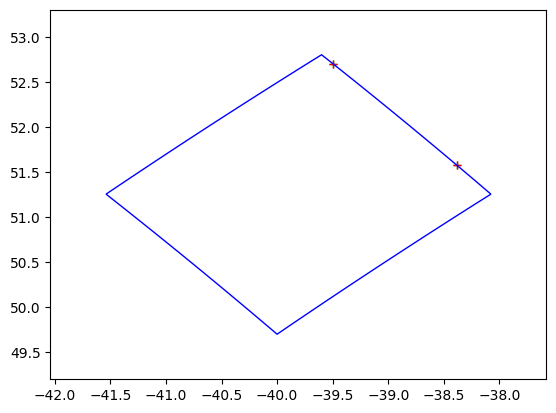

In [17]:
plot_points([extra_pixels, extra_pixels], order, pixel, ['green', 'red'], ['ra_gaia', 'ra_ztf_dr14'], ['dec_gaia', 'dec_ztf_dr14'])

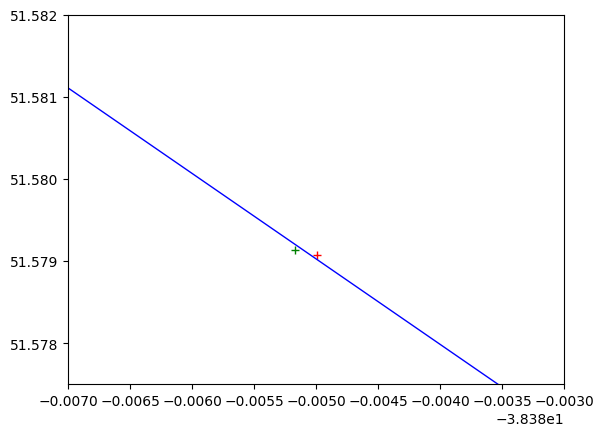

In [26]:
plot_points([extra_pixels, extra_pixels], order, pixel, ['green', 'red'], ['ra_gaia', 'ra_ztf_dr14'], ['dec_gaia', 'dec_ztf_dr14'], xlim=[-38.387, -38.383], ylim = [51.5775, 51.582])